## Import Relevant Modules

In [353]:
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Specify all relevant constants

In [354]:
kbt=2.494339
minS=1.0
maxS=112.0
nbin=20

In [355]:
data=pd.read_csv("COLVAR",sep="\s+", header=None, skiprows=1,usecols=[1,2,3]) 
data.columns=['s(R)','z(R)','bias']
data['s(R)']=data['s(R)'].round(2)
data

,s(R),z(R),bias
0,1.90,0.011533,149.325585
1,1.82,0.011707,148.022618
2,1.72,0.012545,147.008204
3,1.93,0.009537,143.402185
4,1.82,0.009520,141.415963
...,...,...,...
13329,90.42,0.026455,199.897369
13330,92.33,0.025622,198.335748
13331,94.45,0.024892,194.978573
13332,95.89,0.025026,192.737358


## Calculate Maximum bias

In [356]:
bmax=data['bias'].max()

# Calculate Boltzmann weights and write them to a file named "sR.weight"

In [357]:
data['weights']=np.exp((data['bias']-bmax)/kbt)
data.to_csv("sR.weight",index=False,sep="\t",columns=['s(R)','weights'])

## Calculate Free energy and make min-to-zero

In [358]:
data['energy']=-data['bias'] # free-energy is negative of bias potential
min_energy=data['energy'].min() # minimum bias
data['energy']=data['energy']-min_energy # make minimum bias zero

## Binning of data using cut: Create 20 equal-sized bins

In [359]:
data['bins']=pd.cut(data['s(R)'], bins=nbin,labels=[i for i in range(20)])
data

,s(R),z(R),bias,weights,energy,bins
0,1.90,0.011533,149.325585,3.688909e-12,65.665196,0
1,1.82,0.011707,148.022618,2.187942e-12,66.968163,0
2,1.72,0.012545,147.008204,1.456847e-12,67.982577,0
3,1.93,0.009537,143.402185,3.432121e-13,71.588596,0
4,1.82,0.009520,141.415963,1.547881e-13,73.574818,0
...,...,...,...,...,...,...
13329,90.42,0.026455,199.897369,2.355348e-03,15.093412,16
13330,92.33,0.025622,198.335748,1.259384e-03,16.655033,16
13331,94.45,0.024892,194.978573,3.278185e-04,20.012208,16
13332,95.89,0.025026,192.737358,1.334784e-04,22.253423,17


In [360]:
data['bins'].unique()

[0, 1, 2, 3, 4, ..., 15, 16, 17, 18, 19]
Length: 20
Categories (20, int64): [0 < 1 < 2 < 3 ... 16 < 17 < 18 < 19]

## Calculate bin width

In [361]:
bin_width = round((maxS-minS)/float(nbin-1),2)
bin_width

5.84

## Calculate mean within each bin

In [362]:
maxS_actual=114
free_energy=data.groupby('bins')['energy'].mean()
sR_series = pd.Series(dtype=float,data=[(minS + (float(i) * bin_width)) for i in range(len(bin_list))])
data2=pd.DataFrame()
data2['s(R)']=sR_series
data2['norm s(R)']=((data2['s(R)']-data2['s(R)'].min())/(maxS_actual-data2['s(R)'].min())).round(2)
data2['energy']=(free_energy/4.184).round(2)
data2

,s(R),norm s(R),energy
0,1.00,0.00,9.06
1,6.84,0.05,5.49
2,12.68,0.10,5.14
3,18.52,0.16,6.42
4,24.36,0.21,9.47
5,30.20,0.26,11.85
6,36.04,0.31,19.90
7,41.88,0.36,17.28
8,47.72,0.41,13.47
9,53.56,0.47,17.57


## Plot free energy vs normalized s(R)

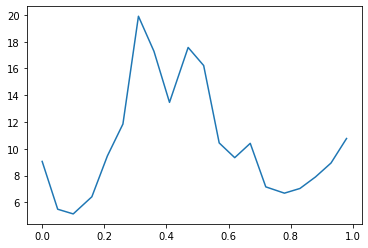

In [363]:
plt.plot(data2['norm s(R)'],data2['energy'])